In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
from twython import Twython
from twython import TwythonStreamer
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sbuciuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
APP_KEY = "LUpqT9BUMzTzdDFVYMls5myJe"
APP_SECRET = "EP31NVKfAg1kWnE3CA0FRRARJMX07irWX9VQUNyUU2pnFPlBeg"
twitter = Twython(APP_KEY, APP_SECRET)

In [3]:
for i in range(0, 17):
    user_timeline = twitter.get_user_timeline(screen_name="realDonaldTrump",count=1000, include_rts=False)

In [4]:
for i, val in enumerate(user_timeline):
    user_timeline[i]['user_screen_name']=user_timeline[i]['user']['screen_name']
    user_timeline[i]['user_followers_count']=user_timeline[i]['user']['followers_count']
    user_timeline[i]['user_id']=user_timeline[i]['user']['id']
    user_timeline[i]['user_created_at']=user_timeline[i]['user']['created_at']
    if 'retweeted_status' in user_timeline[i].keys():
        user_timeline[i]['rt_count'] = user_timeline[i]['retweeted_status']['retweet_count']
        user_timeline[i]['qt_id'] = user_timeline[i]['retweeted_status']['id']
        user_timeline[i]['rt_created'] = user_timeline[i]['retweeted_status']['created_at']
        user_timeline[i]['rt_user_screenname'] = user_timeline[i]['retweeted_status']['user']['name']
        user_timeline[i]['rt_user_id'] = user_timeline[i]['retweeted_status']['user']['id']
        user_timeline[i]['rt_user_followers'] = user_timeline[i]['retweeted_status']['user']['followers_count']
        del user_timeline[i]['retweeted_status']
    if 'quoted_status' in user_timeline[i].keys():
        user_timeline[i]['qt_created'] = user_timeline[i]['quoted_status']['created_at']
        user_timeline[i]['qt_id'] = user_timeline[i]['quoted_status']['id']
        user_timeline[i]['qt_text'] = user_timeline[i]['quoted_status']['text']
        user_timeline[i]['qt_user_screenname'] = user_timeline[i]['quoted_status']['user']['name']
        user_timeline[i]['qt_user_id'] = user_timeline[i]['quoted_status']['user']['id']
        user_timeline[i]['qt_user_followers'] = user_timeline[i]['quoted_status']['user']['followers_count']
        del user_timeline[i]['quoted_status']
    if user_timeline[i]['entities']['urls']: #list
        for j, val in enumerate(user_timeline[i]['entities']['urls']):
            urlj='url_'+str(j)
            user_timeline[i][urlj]=user_timeline[i]['entities']['urls'][j]['expanded_url']
    if user_timeline[i]['entities']['user_mentions']: #list
        for j, val in enumerate(user_timeline[i]['entities']['user_mentions']):
            mentionj='mention_'+str(j)
            user_timeline[i][mentionj] = user_timeline[i]['entities']['user_mentions'][j]['screen_name']
    if user_timeline[i]['entities']['hashtags']: #list
        for j, val in enumerate(user_timeline[i]['entities']['hashtags']):
            hashtagj='hashtag_'+str(j)
            user_timeline[i][hashtagj] = user_timeline[i]['entities']['hashtags'][j]['text']
    if user_timeline[i]['coordinates'] is not None:  #NoneType or Dict
        user_timeline[i]['coord_long'] = user_timeline[i]['coordinates']['coordinates'][0]
        user_timeline[i]['coord_lat'] = user_timeline[i]['coordinates']['coordinates'][1]
    del user_timeline[i]['coordinates']
    del user_timeline[i]['user']
    del user_timeline[i]['entities']
    if 'place' in user_timeline[i].keys():  #NoneType or Dict
        del user_timeline[i]['place']
    if 'extended_entities' in user_timeline[i].keys():
        del user_timeline[i]['extended_entities']
    if 'geo' in user_timeline[i].keys():
        del user_timeline[i]['geo']
        


In [5]:
dftrump = pd.DataFrame(user_timeline)
print(dftrump)

    contributors  coord_lat  coord_long                      created_at  \
0           None        NaN         NaN  Sat Sep 24 02:09:56 +0000 2016   
1           None        NaN         NaN  Fri Sep 23 20:13:49 +0000 2016   
2           None        NaN         NaN  Fri Sep 23 17:32:20 +0000 2016   
3           None        NaN         NaN  Fri Sep 23 17:26:56 +0000 2016   
4           None        NaN         NaN  Fri Sep 23 15:57:47 +0000 2016   
5           None        NaN         NaN  Fri Sep 23 02:09:13 +0000 2016   
6           None        NaN         NaN  Fri Sep 23 01:17:50 +0000 2016   
7           None        NaN         NaN  Thu Sep 22 14:45:45 +0000 2016   
8           None        NaN         NaN  Thu Sep 22 11:02:01 +0000 2016   
9           None        NaN         NaN  Thu Sep 22 00:58:03 +0000 2016   
10          None        NaN         NaN  Thu Sep 22 00:54:26 +0000 2016   
11          None        NaN         NaN  Thu Sep 22 00:49:24 +0000 2016   
12          None        N

In [6]:
#initial creation of dataframe
trumpdf = pd.DataFrame(user_timeline)
trumpdf.head()

,contributors,coord_lat,coord_long,created_at,favorite_count,favorited,hashtag_0,hashtag_1,hashtag_2,hashtag_3,...,retweeted,source,text,truncated,url_0,url_1,user_created_at,user_followers_count,user_id,user_screen_name
0,None,NaN,NaN,Sat Sep 24 02:09:56 +0000 2016,13504,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/android"" ...",Crooked Hillary's bad judgement forced her to ...,False,NaN,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
1,None,NaN,NaN,Fri Sep 23 20:13:49 +0000 2016,9971,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...","Join me in Roanoke, Virginia tomorrow at the B...",True,https://twitter.com/i/web/status/7794134828821...,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
2,None,NaN,NaN,Fri Sep 23 17:32:20 +0000 2016,12484,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...",'How Trump Would Stimulate the U.S. Economy'\n...,False,https://www.washingtonpost.com/opinions/how-tr...,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
3,None,NaN,NaN,Fri Sep 23 17:26:56 +0000 2016,31933,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Hillary Clinton just lost every Republican she...,False,NaN,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
4,None,NaN,NaN,Fri Sep 23 15:57:47 +0000 2016,13534,False,TrumpTrain,MAGA,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Tomorrow's the day! Knock on doors and make ca...,True,https://twitter.com/i/web/status/7793490497786...,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump


In [7]:
realDonaldTrump=trumpdf.append(dftrump, ignore_index=True)

In [8]:
print(realDonaldTrump)

    contributors  coord_lat  coord_long                      created_at  \
0           None        NaN         NaN  Sat Sep 24 02:09:56 +0000 2016   
1           None        NaN         NaN  Fri Sep 23 20:13:49 +0000 2016   
2           None        NaN         NaN  Fri Sep 23 17:32:20 +0000 2016   
3           None        NaN         NaN  Fri Sep 23 17:26:56 +0000 2016   
4           None        NaN         NaN  Fri Sep 23 15:57:47 +0000 2016   
5           None        NaN         NaN  Fri Sep 23 02:09:13 +0000 2016   
6           None        NaN         NaN  Fri Sep 23 01:17:50 +0000 2016   
7           None        NaN         NaN  Thu Sep 22 14:45:45 +0000 2016   
8           None        NaN         NaN  Thu Sep 22 11:02:01 +0000 2016   
9           None        NaN         NaN  Thu Sep 22 00:58:03 +0000 2016   
10          None        NaN         NaN  Thu Sep 22 00:54:26 +0000 2016   
11          None        NaN         NaN  Thu Sep 22 00:49:24 +0000 2016   
12          None        N

In [9]:
#check content
realDonaldTrump.head()

,contributors,coord_lat,coord_long,created_at,favorite_count,favorited,hashtag_0,hashtag_1,hashtag_2,hashtag_3,...,retweeted,source,text,truncated,url_0,url_1,user_created_at,user_followers_count,user_id,user_screen_name
0,None,NaN,NaN,Sat Sep 24 02:09:56 +0000 2016,13504,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/android"" ...",Crooked Hillary's bad judgement forced her to ...,False,NaN,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
1,None,NaN,NaN,Fri Sep 23 20:13:49 +0000 2016,9971,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...","Join me in Roanoke, Virginia tomorrow at the B...",True,https://twitter.com/i/web/status/7794134828821...,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
2,None,NaN,NaN,Fri Sep 23 17:32:20 +0000 2016,12484,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...",'How Trump Would Stimulate the U.S. Economy'\n...,False,https://www.washingtonpost.com/opinions/how-tr...,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
3,None,NaN,NaN,Fri Sep 23 17:26:56 +0000 2016,31933,False,NaN,NaN,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Hillary Clinton just lost every Republican she...,False,NaN,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump
4,None,NaN,NaN,Fri Sep 23 15:57:47 +0000 2016,13534,False,TrumpTrain,MAGA,NaN,NaN,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Tomorrow's the day! Knock on doors and make ca...,True,https://twitter.com/i/web/status/7793490497786...,NaN,Wed Mar 18 13:46:38 +0000 2009,11696228,25073877,realDonaldTrump


In [10]:
#d = dict(screen_name = screen_name, Favorites = favorites_count, Retweets = retweets_count,Date = date, Text = text)

#HillaryClinton = pd.DataFrame({k : pd.Series(v) for k, v in  list(d.items())})
status_texts = realDonaldTrump[['text']]
print(status_texts)

                                                  text
0    Crooked Hillary's bad judgement forced her to ...
1    Join me in Roanoke, Virginia tomorrow at the B...
2    'How Trump Would Stimulate the U.S. Economy'\n...
3    Hillary Clinton just lost every Republican she...
4    Tomorrow's the day! Knock on doors and make ca...
5    Spoke with Governor @PatMcCroryNC of North Car...
6    This is more than a campaign- it is a movement...
7    Join me in Roanoke, Virginia on Saturday eveni...
8                       Will be on @foxandfriends now.
9    I will be interviewed from Cleveland, Ohio, on...
10   "@ThAllenSBoucher: @DiamondandSilk @realDonald...
11                       .@YoungDems4Trump  Thank you!
12   Great new polls! Thank you Nevada, North Carol...
13   Thank you Toledo, Ohio! It is so important for...
14   Hopefully the violence &amp; unrest in Charlot...
15   The situations in Tulsa and Charlotte are trag...
16   It is a MOVEMENT - not a campaign. Leaving the...
17   Thank

In [17]:
#count words in each tweet, we can also lower all the words/characters to by using .lower(),
words_trump = pd.Series(' '.join(realDonaldTrump.text).split())
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [18]:

#implementation of stop words using nltk library for language processing
terms_stop = [term for term in words_trump if term not in stop]

In [19]:
print(terms_stop)

['Crooked', "Hillary's", 'bad', 'judgement', 'forced', 'announce', 'would', 'go', 'Charlotte', 'Saturday', 'grandstand.', 'Dem', 'pols', 'said', 'way,', 'dumb!', 'Join', 'Roanoke,', 'Virginia', 'tomorrow', 'Berglund', 'Center-', 'Coliseum', '6pm!', 'Tickets', 'available', 'at:…', 'https://t.co/bnEE6NX41Z', "'How", 'Trump', 'Would', 'Stimulate', 'U.S.', "Economy'", 'https://t.co/jU3HHglnIu', 'Hillary', 'Clinton', 'lost', 'every', 'Republican', 'ever', 'had,', 'including', 'Never', 'Trump,', 'farmers', '&amp;', 'sm.', 'biz,', 'saying', 'she’ll', 'tax', 'estates', '65%.', "Tomorrow's", 'day!', 'Knock', 'doors', 'make', 'calls', 'us', 'National', 'Day', 'Action!', '#TrumpTrain', '#MAGA…', 'https://t.co/05NY0wJHkL', 'Spoke', 'Governor', '@PatMcCroryNC', 'North', 'Carolina', 'today.', 'He', 'tremendous', 'job', 'tough', 'circumstances.', 'This', 'campaign-', 'movement.', '#MakeAmericaGreatAgain', 'SIGN', 'UP', 'TODAY', '&amp;', 'WE', 'WILL', 'WIN!', 'https://t.co/2XBs5SSRC3', 'Join', 'Roanok

In [20]:
word_counts = {}
for word in terms_stop:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [21]:
print(word_counts)

{'https://t.co/4S4pnx4Q6r': 2, 'returning': 4, 'brilliant': 2, 'best': 2, 'Would': 2, 'wake': 2, '@oreillyfactor.': 2, 'Iraq': 2, 'know': 8, 'tweets.': 2, 'never': 14, '13': 2, 'SIGN': 2, 'years,': 4, 'On': 2, 'https://t.co/3KWOl20zMm': 2, '#TrumpPence16': 2, 'We': 20, 'O': 2, 'States': 4, '8th,': 2, 'me,': 6, 'Hotel': 2, 'a…': 2, 'reception,': 2, '65%.': 2, 'natural': 2, 'tax': 2, 'Club': 2, 'Forum.': 4, 'S': 2, 'leaders,': 2, 'small': 2, 'males,': 2, 'grateful': 2, "#TheDonald's": 2, 'campaign': 4, 'NJ': 2, 'prayers': 4, 'latest': 2, 'S!': 2, 'Tower': 2, 'turns': 2, 'unwatchable.': 2, 'Philadelphia.': 2, 'While': 2, 'Kansas...and': 2, 'American': 8, 'time': 8, '@nytimes': 6, '@IvankaTrump,': 2, 'tribute': 2, 'answered': 2, 'army': 2, 'https://t.co/7hupah1RQN': 2, 'Time': 2, 'people-': 2, 'Bishop': 2, 'joining': 2, '8:10pm': 2, 'https://t.co/05NY0wJHkL': 2, 'had,': 2, 'last': 18, '@tonyschwartz.': 2, 'playbook!': 2, 'bombing': 2, 'https://t.co/l17uzRPyLs': 2, 'real,': 2, 'Faith': 2, '

In [22]:
#one more filtering with some custome specified stopwords what are not in nltk library
filterTump = {k: v for k, v in word_counts.items() if v > 1}

print(filterTump)

Stopwords = ['A','AND','An','And','As','Be','C','this','they',
'Can','D','Do','Don','For','Go','He','IS','Is','It','K','M', 'I',
'O','On','P','Q','R','S','So','T','THE','That','The','Their','There',
'They','This','U','we','you','words','w','ve','u','the','that','than',
'her','he','had','for','e','d','co','a','V','TV','was','to','so','she'
't','such','some','s','re','my','m','ll','is','it','of','as','at','am',
't', 'or','our','in','do','be','them','they','their','this','were','when',
'who','with','what','amp','an','and','are','000','your','she','him','his',
'get','but','would','https','on','realDonaldTrump','have','will','all','has',
'just', 'MakeAmericaGreatAgain','now','out','about','from','by', 'the', 'v', 'b','—Hillary','&amp;']

for k, v in list(filterTump.items()):
    print(k, v)
    if k in Stopwords:
        del filterTump[k]

{'https://t.co/4S4pnx4Q6r': 2, 'returning': 4, 'best': 2, 'Would': 2, 'volunteers': 2, 'know': 8, 'tweets.': 2, 'never': 14, '13': 2, 'SIGN': 2, 'movement.': 2, 'years,': 4, 'On': 2, 'https://t.co/3KWOl20zMm': 2, '#TrumpPence16': 2, 'We': 20, 'O': 2, 'States': 4, '8th,': 2, 'me,': 6, 'Hotel': 2, 'a…': 2, 'differently': 2, '65%.': 2, 'natural': 2, 'tax': 2, 'https://t.co/zvVQnxeiQ9': 2, 'Forum.': 4, 'S': 2, 'properly': 2, 'small': 2, 'males,': 2, 'source': 2, 'grateful': 2, "#TheDonald's": 2, 'campaign': 4, 'NJ': 2, 'prayers': 4, '#MAGA!': 2, 'getting': 4, 'turns': 2, 'major': 4, 'https://t.co/sCOnny1fl3': 2, 'Philadelphia.': 2, 'support-I': 2, 'https://t.co/7hupah1RQN': 2, 'time': 8, '@nytimes': 6, 'answered': 2, 'army': 2, 'Time': 2, 'people-': 2, 'Bishop': 2, 'Florida.': 2, '8:10pm': 2, 'https://t.co/05NY0wJHkL': 2, 'had,': 2, 'last': 18, '@tonyschwartz.': 2, 'playbook!': 2, 'Nevada,': 2, 'https://t.co/l17uzRPyLs': 2, 'real,': 2, 'Faith': 2, 'Crooked': 16, 'almost': 2, 'acid-wash': 2

In [23]:
toptwentyTrump = dict(Counter(filterTump).most_common(20))
print(toptwentyTrump)


{'last': 18, 'Great': 26, 'Hillary': 48, 'Clinton': 24, 'you!': 20, '#ImWithYou': 34, '@realDonaldTrump': 20, 'Trump': 18, '#MAGA': 22, 'GREAT': 18, 'great': 22, 'Join': 24, '#AmericaFirst': 40, 'We': 20, 'Thank': 80, 'MAKE': 20, 'Will': 20, '@foxandfriends': 18, 'Enjoy!': 20, 'AMERICA': 22}


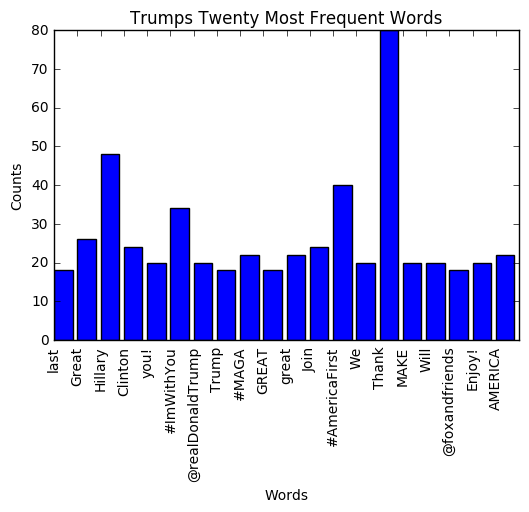

In [24]:
plt.bar(range(len(toptwentyTrump)), toptwentyTrump.values(), align='edge')
plt.xticks(range(len(toptwentyTrump)), toptwentyTrump.keys(), rotation=90)
plt.title('Trumps Twenty Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Counts')

In [25]:
#counting words
from collections import Counter
counts = Counter(word_counts)
print(counts)

Counter({'Thank': 80, 'I': 80, 'Hillary': 48, '#AmericaFirst': 40, '&amp;': 40, '#ImWithYou': 34, 'The': 26, 'Great': 26, 'Join': 24, 'Clinton': 24, '#MAGA': 22, 'AMERICA': 22, 'great': 22, '@realDonaldTrump': 20, 'you!': 20, 'MAKE': 20, 'We': 20, 'Will': 20, 'Enjoy!': 20, 'last': 18, 'GREAT': 18, 'Trump': 18, 'get': 18, '@foxandfriends': 18, 'Just': 16, 'said': 16, '#MakeAmericaGreatAgain': 16, 'Obama': 16, 'AGAIN!': 16, 'Crooked': 16, 'interviewed': 16, 'never': 14, 'poll': 14, 'new': 14, 'Mexico': 12, 'It': 12, 'wonderful': 12, 'North': 12, 'people': 12, 'would': 12, 'failing': 12, 'going': 10, '@CNN': 10, 'us': 10, 'many': 10, 'go': 10, 'today': 10, 'thank': 10, 'tonight': 10, 'https://t.co/3KWOl2ibaW': 10, 'A': 10, 'President': 8, 'night.': 8, 'Carolina': 8, 'rally': 8, 'They': 8, 'soon.': 8, 'Pensacola,': 8, 'knows': 8, 'American': 8, 'big': 8, '@oreillyfactor': 8, 'Heading': 8, 'know': 8, 'time': 8, 'results': 8, 'back': 8, 'much': 8, 'Never': 8, 'Together,': 8, 'Florida': 8, 'e

In [26]:
a = Counter(counts).most_common(20)
print (a)

[('Thank', 80), ('I', 80), ('Hillary', 48), ('#AmericaFirst', 40), ('&amp;', 40), ('#ImWithYou', 34), ('The', 26), ('Great', 26), ('Join', 24), ('Clinton', 24), ('#MAGA', 22), ('AMERICA', 22), ('great', 22), ('We', 20), ('@realDonaldTrump', 20), ('you!', 20), ('MAKE', 20), ('Will', 20), ('Enjoy!', 20), ('last', 18)]


In [28]:
from prettytable import PrettyTable
sorted(a)
pt = PrettyTable(field_names=['word', 'Frequency_Trump'])
[ pt.add_row(row) for row in sorted(a, reverse=True)[:20] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+------------------+-----------------+
| word             | Frequency_Trump |
+------------------+-----------------+
| you!             | 20              |
| last             | 18              |
| great            | 22              |
| Will             | 20              |
| We               | 20              |
| The              | 26              |
| Thank            | 80              |
| MAKE             | 20              |
| Join             | 24              |
| I                | 80              |
| Hillary          | 48              |
| Great            | 26              |
| Enjoy!           | 20              |
| Clinton          | 24              |
| AMERICA          | 22              |
| @realDonaldTrump | 20              |
| &amp;            | 40              |
| #MAGA            | 22              |
| #ImWithYou       | 34              |
| #AmericaFirst    | 40              |
+------------------+-----------------+
